# Task 4: Binary Classification - Baseline Model (Logistic Regression)

This notebook loads the preprocessed data saved by `1_consolidate_data.ipynb` and trains/evaluates a baseline Logistic Regression model.

In [8]:
from sklearn.linear_model import LogisticRegression
import utils # Import the new utils module


In [9]:
# Load the preprocessed data using the utility function
try:
    df = utils.load_preprocessed_data('data/preprocessed_data2.parquet') # Default path 'data/preprocessed_data.parquet'
except Exception as e:
    print(f"Stopping notebook execution due to error in loading data: {e}")
    raise


Loading preprocessed data from data/preprocessed_data2.parquet...
Data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
Index: 3700 entries, 0 to 739
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BIB           3700 non-null   float64
 1   FAN           3700 non-null   float64
 2   LUK           3700 non-null   float64
 3   NUS           3700 non-null   float64
 4   SIS           3700 non-null   float64
 5   UIN           3700 non-null   float64
 6   WET           3700 non-null   float64
 7   COD_iii       3700 non-null   float64
 8   COD_rrr       3700 non-null   float64
 9   COD_uuu       3700 non-null   float64
 10  ERG_aaa       3700 non-null   float64
 11  ERG_missing   3700 non-null   float64
 12  ERG_nnn       3700 non-null   float64
 13  ERG_www       3700 non-null   float64
 14  GJAH_ii       3700 non-null   float64
 15  GJAH_iii      3700 non-null   float64
 16  GJAH_missing  3700 non-null 

In [10]:
# Separate train/test and features/target using utility function
X_train_scaled, y_train, X_test_scaled, y_test = utils.split_data_features_target(df)

# Convert target variables using utility function
y_train = utils.convert_target_variable(y_train)
y_test = utils.convert_target_variable(y_test)

# The old print statements for shapes are now handled within utils.split_data_features_target()


Training features shape: (2960, 53), Training target shape: (2960,)
Test features shape: (740, 53), Test target shape: (740,)

Converting target variable 'Class' to numeric (n=0, y=1)...
Target variable converted.
Value counts:
 Class
1    2739
0     221
Name: count, dtype: int64

Converting target variable 'Class' to numeric (n=0, y=1)...
Target variable converted.
Value counts:
 Class
1    685
0     55
Name: count, dtype: int64


# Train and Evaluate Logistic Regression Model

Using the scaled and imputed data loaded from the parquet file.


Training Logistic Regression model...
Model training complete.

--- Logistic Regression Evaluation ---
Accuracy: 0.9554

Classification Report:
              precision    recall  f1-score   support

 Class n (0)       0.92      0.44      0.59        55
 Class y (1)       0.96      1.00      0.98       685

    accuracy                           0.96       740
   macro avg       0.94      0.72      0.78       740
weighted avg       0.95      0.96      0.95       740


Confusion Matrix:
[[ 24  31]
 [  2 683]]


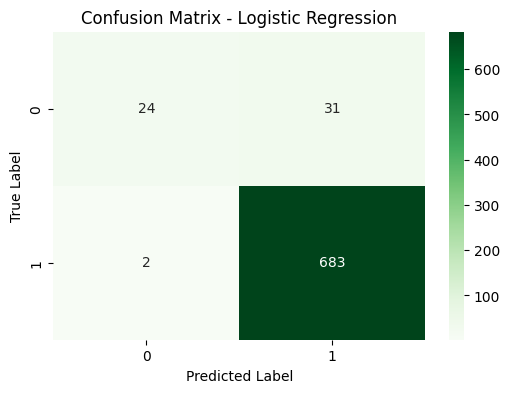


ROC AUC Score: 0.9145


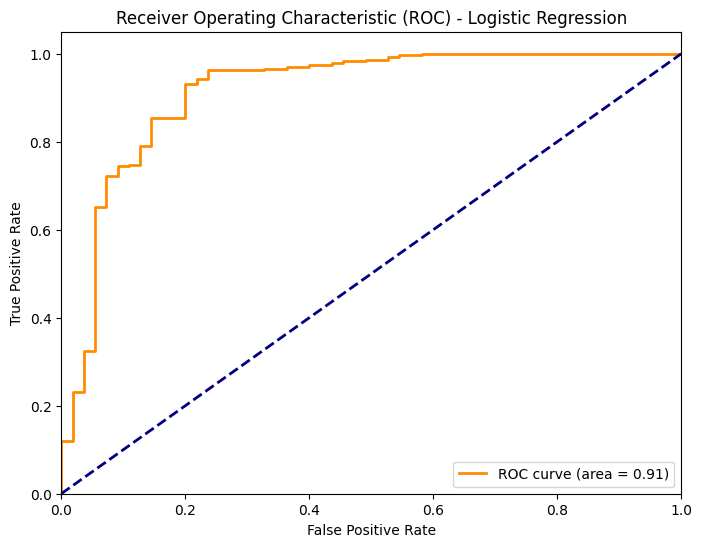

In [11]:
# Train and Evaluate Logistic Regression Model
# Using the scaled and imputed data.

# 1. Instantiate Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train Model
print("\nTraining Logistic Regression model...")
log_reg.fit(X_train_scaled, y_train)
print("Model training complete.")

# 3. Make Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# 4. Evaluate Model using the utility function
# The utility function `evaluate_model_performance` also handles ROC/AUC
utils.evaluate_model_performance(y_test, y_pred_lr, X_test_scaled, log_reg, "Logistic Regression")
